* Введение в информатику - 5
* Работа в Excel 14
* Всемирная сеть (www) - 12
* Локальные сети - 4
* Информационные технологии - 14



* Для допуска - 120
* Для автомата - 200


In [6]:
import matplotlib.pylab as plt
import numpy as np

from sklearn.linear_model import LogisticRegression

from mutils import *

In [2]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

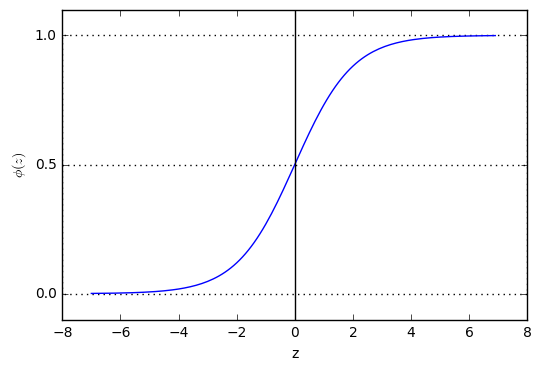

In [3]:
z = np.arange(-7, 7, .1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0., color='k')
plt.axhspan(0., 1., facecolor='1.0', alpha=1., ls='dotted')
plt.axhline(y=.5, ls='dotted', color='k')
plt.yticks([0., .5, 1.])
plt.ylim(-.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

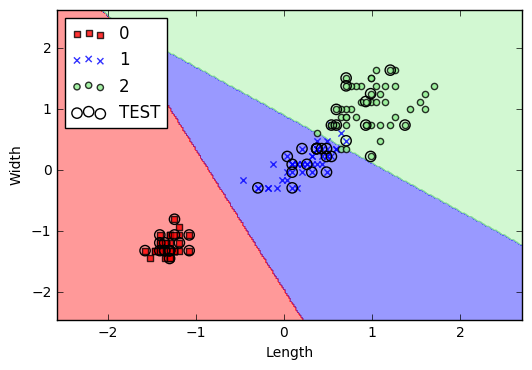

In [7]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      clf=lr, test_idx=range(105, 150))
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend(loc='upper left')
plt.show()

In [8]:
print('Zero class - {0:.4f}.\nFirst class - {1:.4f}.\nSecond class - {2:.4f}.'
      .format(*lr.predict_proba(X_test_std[0, :].reshape(1, -1))[0]))

Zero class - 0.0000.
First class - 0.0632.
Second class - 0.9368.


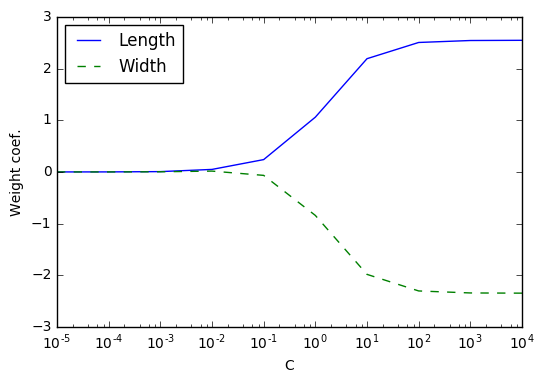

In [9]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10 ** c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10 ** c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Length')
plt.plot(params, weights[:, 1], label='Width', linestyle='--')
plt.ylabel('Weight coef.')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

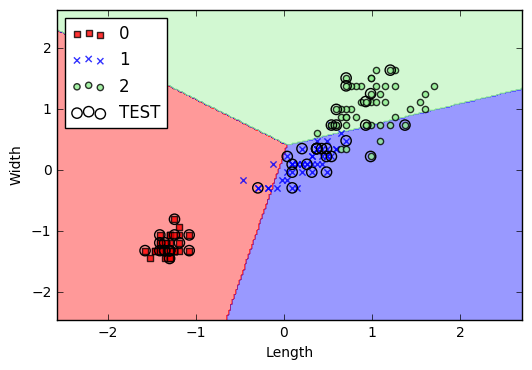

In [11]:
from sklearn.linear_model import SGDClassifier

lr = SGDClassifier(loss='log')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      clf=lr, test_idx=range(105, 150))
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend(loc='upper left')
plt.show()

In [12]:
print('Zero class - {0:.4f}.\nFirst class - {1:.4f}.\nSecond class - {2:.4f}.'
      .format(*lr.predict_proba(X_test_std[0, :].reshape(1, -1))[0]))

Zero class - 0.0000.
First class - 0.0012.
Second class - 0.9988.
